In [1]:
import tensorflow as tf
from tensorflow import  keras
from tensorflow.keras import  layers
import matplotlib.pyplot as plt
%matplotlib inline

# 一个简单的全连接神经网络

In [2]:
# 分如下几个步骤
# 加载数据集
# 构造模型/编译模型
# 训练模型


In [3]:
# 我这里也是加载MNIST数据集吧。
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# 构造模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),   # 这个先是展平操作
  tf.keras.layers.Dense(128, activation='relu'),   # 全连接层
  tf.keras.layers.Dropout(0.2),                    # 随机丢弃一些数据
  tf.keras.layers.Dense(10, activation='softmax')  # 全连接层，用softmax
])
# 编译模型
model.compile(optimizer='adam',                        # 优化器
              loss='sparse_categorical_crossentropy',  # 损失函数
              metrics=['accuracy'])

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 72s 1ms/sample - loss: 0.3110 - accuracy: 0.9091 - val_loss: 0.1303 - val_accuracy: 0.9638
Epoch 2/5
54000/54000 [==============================] - 14s 257us/sample - loss: 0.1477 - accuracy: 0.9564 - val_loss: 0.0891 - val_accuracy: 0.9758
Epoch 3/5
54000/54000 [==============================] - 13s 239us/sample - loss: 0.1114 - accuracy: 0.9662 - val_loss: 0.0803 - val_accuracy: 0.9758
Epoch 4/5
54000/54000 [==============================] - 12s 231us/sample - loss: 0.0888 - accuracy: 0.9725 - val_loss: 0.0713 - val_accuracy: 0.9778
Epoch 5/5
54000/54000 [==============================] - 13s 241us/sample - loss: 0.0742 - accuracy: 0.9765 - val_loss: 0.0723 - val_accuracy: 0.9795
10000/10000 - 2s - loss: 0.0747 - accuracy: 0.9774


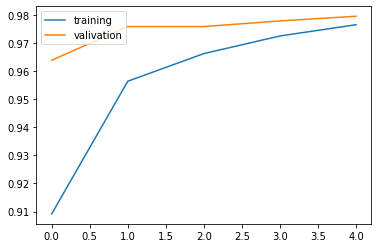

In [5]:
# 训练并验证模型
history =model.fit(x_train, y_train, epochs=5,validation_split=0.1)      # 训练模型，epochs指的就是训练过程中数据将被“轮”多少次
model.evaluate(x_test,  y_test, verbose=2) # 验证模型,verbose = 2 为每个epoch输出一行记录
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')

# 一个简单的卷积神经网络

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 133s 2ms/sample - loss: 0.1634 - accuracy: 0.9497 - val_loss: 0.0700 - val_accuracy: 0.9790
Epoch 2/5
54000/54000 [==============================] - 22s 416us/sample - loss: 0.0501 - accuracy: 0.9845 - val_loss: 0.0370 - val_accuracy: 0.9873
Epoch 3/5
54000/54000 [==============================] - 23s 431us/sample - loss: 0.0366 - accuracy: 0.9887 - val_loss: 0.0351 - val_accuracy: 0.9895
Epoch 4/5
54000/54000 [==============================] - 24s 441us/sample - loss: 0.0271 - accuracy: 0.9912 - val_loss: 0.0368 - val_accuracy: 0.9902
Epoch 5/5
54000/54000 [==============================] - 24s 451us/sample - loss: 0.0214 - accuracy: 0.9927 - val_loss: 0.0334 - val_accuracy: 0.9912
10000/10000 - 2s - loss: 0.0269 - accuracy: 0.9916


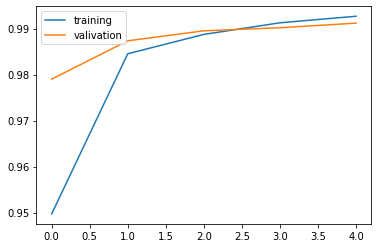

In [6]:
# 这里还是用手写字体来识别吧，不过不同的是，这里换成卷积神经网络。
# 卷积神经网络是用Conv2D这个卷积和MaxPooling2D这个池化来处理数据的。
model_conv2d=tf.keras.models.Sequential([
    # 第1层卷积，卷积核大小为3*3，32个，28*28为待训练图片的大小
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    # 第2层卷积，卷积核大小为3*3，64个
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # 第3层卷积，卷积核大小为3*3，64个
    layers.Conv2D(64, (3, 3), activation='relu'),
    # 展平,原先是矩阵，现在要变成向量
    layers.Flatten(),
    # 如下用2个全连接层
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_conv2d.compile(optimizer='adam',                        # 优化器
              loss='sparse_categorical_crossentropy',  # 损失函数
              metrics=['accuracy'])
# 数据集要更改尺寸,原先是每一个都是28*28的图像，现在要加上一个高度
x_train_2 = x_train.reshape((-1,28,28,1))
x_test_2 = x_test.reshape((-1,28,28,1))
# 我同样训练5次吧
history=model_conv2d.fit(x_train_2, y_train, epochs=5,validation_split=0.1)      # 训练模型，epochs指的就是训练过程中数据将被“轮”多少次
model_conv2d.evaluate(x_test_2,  y_test, verbose=2) # 验证模型,verbose = 2 为每个epoch输出一行记录

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')

# 一个增强的卷积神经网络,深度网络

In [7]:
x_train_2.shape

(60000, 28, 28, 1)

In [8]:
x_train_2_shape = x_train_2.shape
# 相比较卷积神经网络，多了filters，深度啦。
deep_model = keras.Sequential(
[
    layers.Conv2D(input_shape=((x_train_2_shape[1], x_train_2_shape[2], x_train_2_shape[3])),  # 自动根据输入的尺寸
                 filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

deep_model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])
deep_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)             

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 41s 761us/sample - loss: 0.1529 - accuracy: 0.9529 - val_loss: 0.0546 - val_accuracy: 0.9827
Epoch 2/5
54000/54000 [==============================] - 37s 688us/sample - loss: 0.0481 - accuracy: 0.9850 - val_loss: 0.0393 - val_accuracy: 0.9867
Epoch 3/5
54000/54000 [==============================] - 36s 662us/sample - loss: 0.0344 - accuracy: 0.9891 - val_loss: 0.0366 - val_accuracy: 0.9900
Epoch 4/5
54000/54000 [==============================] - 35s 650us/sample - loss: 0.0276 - accuracy: 0.9909 - val_loss: 0.0372 - val_accuracy: 0.9888
Epoch 5/5
54000/54000 [==============================] - 35s 647us/sample - loss: 0.0225 - accuracy: 0.9927 - val_loss: 0.0272 - val_accuracy: 0.9917
10000/10000 - 3s - loss: 0.0290 - accuracy: 0.9906


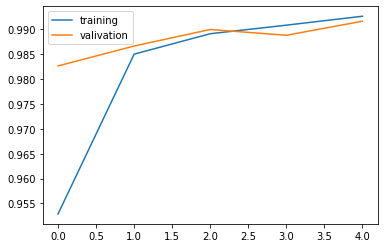

In [9]:
# 训练并验证模型
history = deep_model.fit(x_train_2, y_train, epochs=5,validation_split=0.1)      # 训练模型，epochs指的就是训练过程中数据将被“轮”多少次
deep_model.evaluate(x_test_2,  y_test, verbose=2) # 验证模型,verbose = 2 为每个epoch输出一行记录
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')

# 一个简单的全连接神经网络的API构建实现

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 14s 253us/sample - loss: 0.5315 - accuracy: 0.8565 - val_loss: 0.2771 - val_accuracy: 0.9237
Epoch 2/5
54000/54000 [==============================] - 12s 226us/sample - loss: 0.3550 - accuracy: 0.8986 - val_loss: 0.2508 - val_accuracy: 0.9298
Epoch 3/5
54000/54000 [==============================] - 19s 361us/sample - loss: 0.3325 - accuracy: 0.9061 - val_loss: 0.2403 - val_accuracy: 0.9338
Epoch 4/5
54000/54000 [==============================] - 16s 304us/sample - loss: 0.3237 - accuracy: 0.9074 - val_loss: 0.2314 - val_accuracy: 0.9353
Epoch 5/5
54000/54000 [==============================] - 16s 291us/sample - loss: 0.3190 - accuracy: 0.9095 - val_loss: 0.2291 - val_accuracy: 0.9348
10000/10000 - 2s - loss: 0.2749 - accuracy: 0.9237


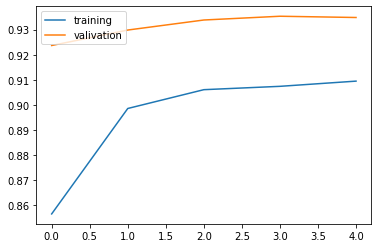

In [11]:
# 构造模型
input_x = tf.keras.Input(shape=(28,28))    # 输入是一个28*28的表
flattern_x = tf.keras.layers.Flatten()(input_x) # 展平
hidden1 = tf.keras.layers.Flatten(input_shape=(28, 28))(flattern_x)
hidden1_dropout = tf.keras.layers.Dropout(0.2)(hidden1)
pred = tf.keras.layers.Dense(10, activation='softmax')(hidden1_dropout)

model_api = tf.keras.Model(inputs=input_x, outputs=pred)  # 模型

# 编译模型
model_api.compile(optimizer='adam',                        # 优化器
              loss='sparse_categorical_crossentropy',  # 损失函数
              metrics=['accuracy'])

# 训练并验证模型
history =model_api.fit(x_train, y_train, epochs=5,validation_split=0.1)      # 训练模型，epochs指的就是训练过程中数据将被“轮”多少次
model_api.evaluate(x_test,  y_test, verbose=2) # 验证模型,verbose = 2 为每个epoch输出一行记录
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')